In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
median_data = pd.read_csv("../dv-property-investments-2025/clean_median_sale_price_v2_df.csv")
median_data_df = pd.DataFrame(median_data)
median_data_df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517,342000,356000,371000,380667,...,543333,528333,518333,515333,509500,510333,516667,535833,558333,579667
1,"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667,450667,465000,468333,471667,...,852000,840333,827000,818333,816667,827333,839000,854000,873333,888333
2,"Chicago, IL",IL,162833.0,158000.0,160218.0,170218,183385,197833,207500,212333,...,285000,278333,273333,270000,269000,275633,287300,300300,313167,319833
3,"Dallas, TX",TX,151667.0,152167.0,155333.0,164500,172800,178467,181633,181125,...,390500,382500,373333,363333,362333,367000,377000,384667,395000,400333
4,"Houston, TX",TX,149833.0,148572.0,150405.0,160155,167417,174900,177650,178650,...,321000,316000,310667,306000,304333,306333,313333,321667,328667,333667


In [3]:
#function that replaces 0 values with an average values 
def fill_zero_with_avg(df):
    new_df = df.copy()     # Create Copy
    for col in df.columns:  # Iterate over columns
        if df[col].dtype == 'object': # If its non-numeric, pass over it
            pass
        else:
            for index, row in df.iterrows(): # for index and row, if the value is na
                if pd.isna(row[col]):
                    indexer = 1
                    # Capture adjacent values
                    while (index + indexer) in df.index and pd.isna(df.at[index + indexer, col]):
                        indexer += 1
                    if (index - 1) in df.index and (index + indexer) in df.index:
                        # Generate average of flanking values
                        new_df.at[index, col] = (df.at[index - 1, col] + df.at[index + indexer, col]) / 2
    return new_df
fill_zero_with_avg(median_data_df) #running the function on the original df

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517,342000,356000,371000,380667,...,543333,528333,518333,515333,509500,510333,516667,535833,558333,579667
1,"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667,450667,465000,468333,471667,...,852000,840333,827000,818333,816667,827333,839000,854000,873333,888333
2,"Chicago, IL",IL,162833.0,158000.0,160218.0,170218,183385,197833,207500,212333,...,285000,278333,273333,270000,269000,275633,287300,300300,313167,319833
3,"Dallas, TX",TX,151667.0,152167.0,155333.0,164500,172800,178467,181633,181125,...,390500,382500,373333,363333,362333,367000,377000,384667,395000,400333
4,"Houston, TX",TX,149833.0,148572.0,150405.0,160155,167417,174900,177650,178650,...,321000,316000,310667,306000,304333,306333,313333,321667,328667,333667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,"Easton, MD",MD,241246.0,224825.0,281833.0,279167,295667,279542,311208,296875,...,435833,449167,432483,402483,402567,390900,380900,402483,436667,475000
471,"Kill Devil Hills, NC",NC,414000.0,384000.0,352833.0,307833,303833,292500,288333,281667,...,526333,541333,508333,531667,520500,536333,524667,525833,526667,524833
472,"Brevard, NC",NC,152333.0,155333.0,157333.0,150667,159417,167417,190417,196167,...,407333,410667,418167,419000,397500,346667,357000,396167,439500,465833
473,"Breckenridge, CO",CO,363750.0,393417.0,402167.0,390500,374425,348592,355175,339583,...,907833,922833,943667,981738,981404,907238,937500,896167,920500,901000


In [4]:
#setting RegionName column as our index
median_data_df.set_index('RegionName', inplace=True)
median_data_df

,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"New York, NY",NY,344911.0,339350.0,335350.0,333517,342000,356000,371000,380667,378083,...,543333,528333,518333,515333,509500,510333,516667,535833,558333,579667
"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667,450667,465000,468333,471667,468667,...,852000,840333,827000,818333,816667,827333,839000,854000,873333,888333
"Chicago, IL",IL,162833.0,158000.0,160218.0,170218,183385,197833,207500,212333,205167,...,285000,278333,273333,270000,269000,275633,287300,300300,313167,319833
"Dallas, TX",TX,151667.0,152167.0,155333.0,164500,172800,178467,181633,181125,178125,...,390500,382500,373333,363333,362333,367000,377000,384667,395000,400333
"Houston, TX",TX,149833.0,148572.0,150405.0,160155,167417,174900,177650,178650,174833,...,321000,316000,310667,306000,304333,306333,313333,321667,328667,333667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Easton, MD",MD,241246.0,224825.0,281833.0,279167,295667,279542,311208,296875,303333,...,435833,449167,432483,402483,402567,390900,380900,402483,436667,475000
"Kill Devil Hills, NC",NC,414000.0,384000.0,352833.0,307833,303833,292500,288333,281667,258333,...,526333,541333,508333,531667,520500,536333,524667,525833,526667,524833
"Brevard, NC",NC,152333.0,155333.0,157333.0,150667,159417,167417,190417,196167,192833,...,407333,410667,418167,419000,397500,346667,357000,396167,439500,465833


In [5]:
#Dropping the StateName column 
median_data_df = median_data_df.drop(columns = ['StateName'])
median_data_df

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"New York, NY",344911.0,339350.0,335350.0,333517,342000,356000,371000,380667,378083,369083,...,543333,528333,518333,515333,509500,510333,516667,535833,558333,579667
"Los Angeles, CA",394000.0,397333.0,407333.0,430667,450667,465000,468333,471667,468667,465333,...,852000,840333,827000,818333,816667,827333,839000,854000,873333,888333
"Chicago, IL",162833.0,158000.0,160218.0,170218,183385,197833,207500,212333,205167,195167,...,285000,278333,273333,270000,269000,275633,287300,300300,313167,319833
"Dallas, TX",151667.0,152167.0,155333.0,164500,172800,178467,181633,181125,178125,173792,...,390500,382500,373333,363333,362333,367000,377000,384667,395000,400333
"Houston, TX",149833.0,148572.0,150405.0,160155,167417,174900,177650,178650,174833,171000,...,321000,316000,310667,306000,304333,306333,313333,321667,328667,333667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Easton, MD",241246.0,224825.0,281833.0,279167,295667,279542,311208,296875,303333,286667,...,435833,449167,432483,402483,402567,390900,380900,402483,436667,475000
"Kill Devil Hills, NC",414000.0,384000.0,352833.0,307833,303833,292500,288333,281667,258333,259870,...,526333,541333,508333,531667,520500,536333,524667,525833,526667,524833
"Brevard, NC",152333.0,155333.0,157333.0,150667,159417,167417,190417,196167,192833,180333,...,407333,410667,418167,419000,397500,346667,357000,396167,439500,465833


In [6]:
#Calculating the mean of median house prices over the years per city
mean_prices_over_time = median_data_df.mean(axis = 1)
mean_prices_over_time 

RegionName
New York, NY             418820.598425
Los Angeles, CA          630603.377953
Chicago, IL              232969.881890
Dallas, TX               260094.212598
Houston, TX              230887.023622
                             ...      
Easton, MD               342768.574803
Kill Devil Hills, NC     351009.724409
Brevard, NC              267240.283465
Breckenridge, CO         566556.157480
Steamboat Springs, CO    482374.362205
Length: 475, dtype: float64

In [7]:
#Calculating the mean of median house prices across all US cities per month
mean_prices_monthly = median_data_df.mean(axis = 0)
mean_prices_monthly

1/31/2013    151215.130526
2/28/2013    149610.671579
3/31/2013    150610.866316
4/30/2013    154304.566316
5/31/2013    159658.934737
                 ...      
3/31/2023    297965.867368
4/30/2023    305335.122105
5/31/2023    314534.753684
6/30/2023    323474.012632
7/31/2023    328940.414737
Length: 127, dtype: float64

In [8]:
# Group the DataFrame by the year and apply the median function
mean_prices_per_year = median_data_df.groupby(median_data_df.columns.str.extract(r'(\d{4})', expand=False), axis=1).mean()

# Display the resulting DataFrame
mean_prices_per_year= mean_prices_per_year.round(1) #rounding the values to one decimal point
mean_prices_per_year

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
RegionName,,,,,,,,,,,
"New York, NY",354864.8,361572.2,369616.9,376399.1,389472.2,400291.7,405583.0,434013.9,495750.7,534481.5,532238.0
"Los Angeles, CA",445361.1,487451.4,514118.0,546705.7,583020.8,624083.4,634999.9,683874.9,793465.2,867722.1,845285.6
"Chicago, IL",185218.4,198744.5,206727.7,210647.2,221319.3,229150.8,233280.5,249059.6,273513.9,288333.2,290747.6
"Dallas, TX",169050.8,180463.9,199289.3,218775.0,240778.2,255209.5,261709.2,281656.2,334541.7,390384.3,378523.7
"Houston, TX",165756.8,179083.9,193025.7,201646.2,212550.7,220736.1,229242.4,245263.8,288524.3,323224.4,316285.7
...,...,...,...,...,...,...,...,...,...,...,...
"Easton, MD",279030.2,311270.9,285820.8,294955.5,319786.7,314395.8,347619.4,396145.8,414201.3,423490.8,413000.0
"Kill Devil Hills, NC",308439.6,269113.2,267056.6,285835.3,305861.1,319330.6,325306.9,361305.5,446131.9,518930.5,527214.3
"Brevard, NC",173395.8,188361.5,203715.2,217000.1,241652.8,241361.1,269304.9,300305.6,353609.8,404447.2,403095.3


In [9]:
#Calculating Outliers per year
# Create an empty dictionary to store outliers by year
outliers_by_year = {}

# Iterate through columns representing each year
for year in range(2013, 2024):
    column_name = str(year)
    
    # Calculate quartiles and IQR for the current year
    Q1 = mean_prices_per_year[column_name].quantile(0.25)
    Q3 = mean_prices_per_year[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for the current year
    outliers = mean_prices_per_year[(mean_prices_per_year[column_name] < lower_bound) | (mean_prices_per_year[column_name] > upper_bound)]
    
    # Store the outlier cities in the dictionary if any are found
    if not outliers.empty:
        outliers_by_year[column_name] = list(outliers.index)
        
#Print Outliers
for year, outlier_cities in outliers_by_year.items():
    print(f"Year {year}:")
    for city in outlier_cities:
        print(f"- {city}")
    print("-" * 40)

Year 2013:
- New York, NY
- Los Angeles, CA
- Washington, DC
- Boston, MA
- San Francisco, CA
- Seattle, WA
- San Diego, CA
- San Jose, CA
- Urban Honolulu, HI
- Bridgeport, CT
- Oxnard, CA
- Santa Rosa, CA
- Santa Maria, CA
- Salinas, CA
- Boulder, CO
- San Luis Obispo, CA
- Santa Cruz, CA
- Barnstable Town, MA
- Kahului, HI
- Napa, CA
- Truckee, CA
- Ocean City, NJ
- Ukiah, CA
- Key West, FL
- Glenwood Springs, CO
- Heber, UT
- Kapaa, HI
- Edwards, CO
- Durango, CO
- Easton, MD
- Kill Devil Hills, NC
- Breckenridge, CO
- Steamboat Springs, CO
----------------------------------------
Year 2014:
- New York, NY
- Los Angeles, CA
- Washington, DC
- Boston, MA
- San Francisco, CA
- Seattle, WA
- San Diego, CA
- San Jose, CA
- Urban Honolulu, HI
- Bridgeport, CT
- Oxnard, CA
- Santa Rosa, CA
- Vallejo, CA
- Santa Maria, CA
- Salinas, CA
- Boulder, CO
- San Luis Obispo, CA
- Santa Cruz, CA
- Barnstable Town, MA
- Kahului, HI
- Napa, CA
- Truckee, CA
- Ocean City, NJ
- Ukiah, CA
- Key West, 

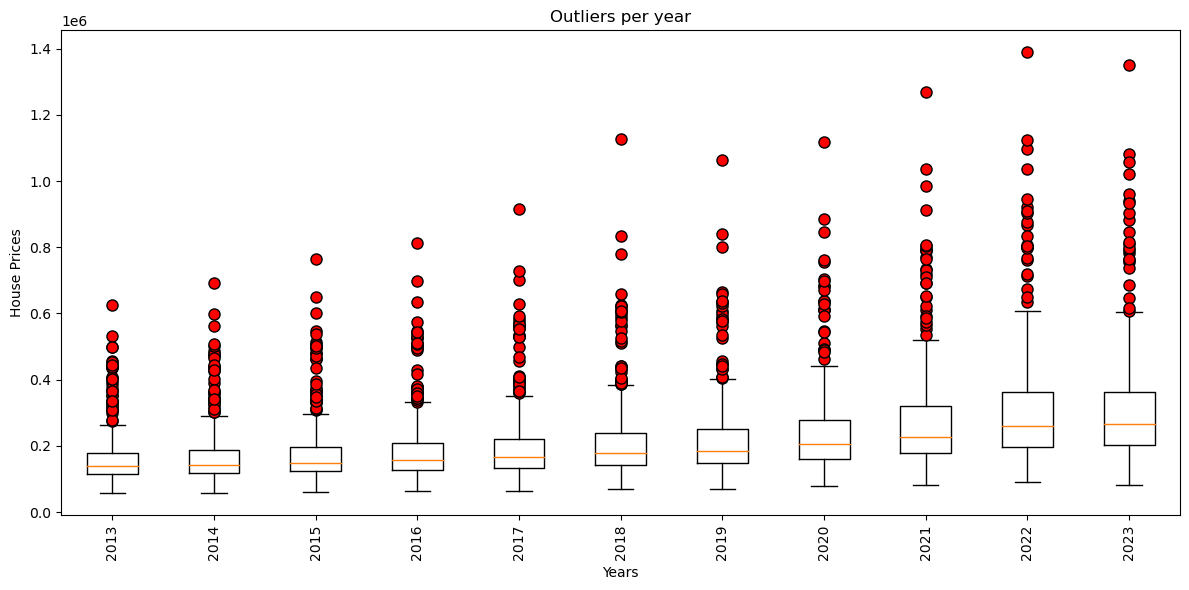

In [17]:
#plot a boxplot to visualize outliers per year
plt.figure(figsize=(12,6))
plt.boxplot(mean_prices_per_year,flierprops={'marker':'o', 'markerfacecolor':'red', 'markersize':8}) #
labels = ['2013', '2014', '2015', '2016', '2017', '2018' ,'2019', '2020', '2021', '2022', '2023'] #creating x labels
plt.xticks(range(1, len(labels) + 1), labels, rotation=90)
plt.title('Outliers per year')
plt.xlabel('Years')
plt.ylabel('House Prices')
plt.tight_layout()
plt.savefig("Images\SummaryStatiscs\Ouliers.png")
plt.show()

In [11]:
#median house prices across all cities per year
median_prices_yearly = mean_prices_per_year.median(axis=0).round(0)
median_prices_yearly

2013    139295.0
2014    143655.0
2015    149736.0
2016    157103.0
2017    165122.0
2018    177532.0
2019    185853.0
2020    206889.0
2021    228124.0
2022    260146.0
2023    265093.0
dtype: float64

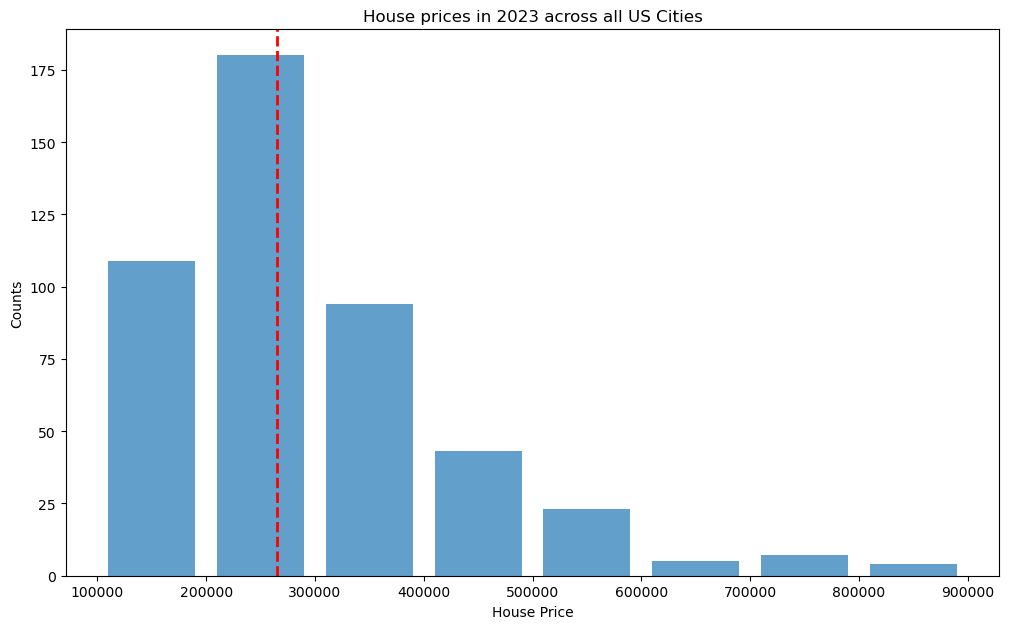

In [18]:
#plot a histogram showing the mean prices of US cities in 2023
plt.figure(figsize=(10,6))
bins = [100000, 200000 , 300000, 400000, 500000, 600000, 700000, 800000, 900000] #house prices
data = mean_prices_per_year['2023'] #data from the year 2023
plt.hist(data, bins = bins, alpha=0.7, rwidth=0.8 ) #plotting using plt
median_2023 = 265093 #getting this value from median_prices_yearly
#Add a vertical line for median house price of 2023
plt.axvline(median_2023, color='red', linestyle='dashed', linewidth=2)
plt.tight_layout()
plt.title("House prices in 2023 across all US Cities")
plt.xlabel('House Price')
plt.ylabel('Counts')
plt.savefig("Images\SummaryStatiscs\CentralT2023.png")

plt.show()

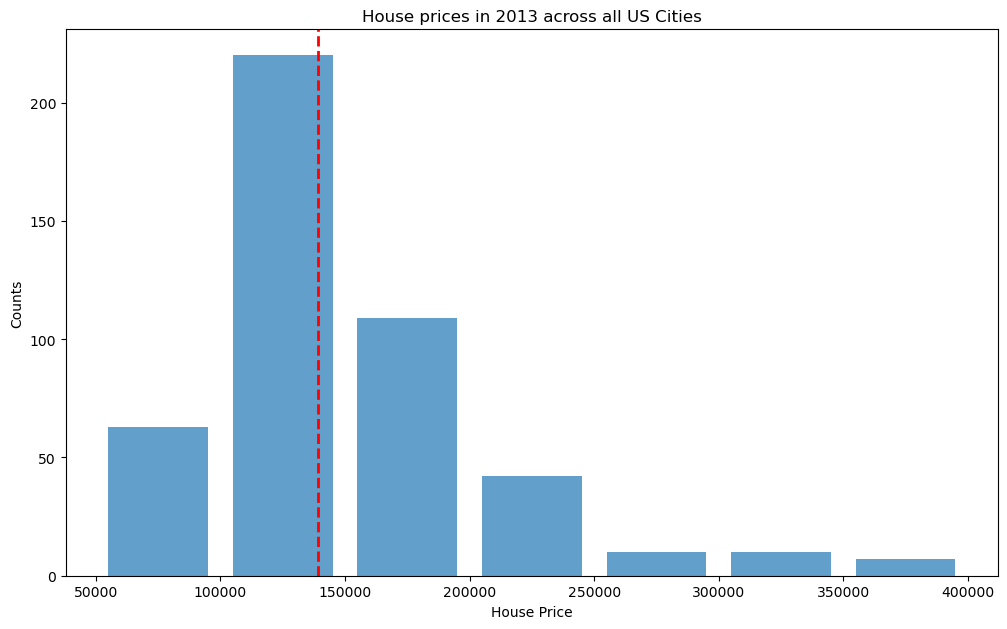

In [19]:
#plot a histogram showing the mean prices of US cities in 2013
plt.figure(figsize=(10,6))
bins = [50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]
#plt.hist(mean_prices_yearly, bins=bins, alpha=0.7, rwidth=0.8 )
data = mean_prices_per_year['2013'] 
plt.hist(data, bins = bins, alpha=0.7, rwidth=0.8 )
median_2013 = 139295
#Add a vertical line for median house price of 2013
plt.axvline(median_2013, color='red', linestyle='dashed', linewidth=2)
plt.tight_layout()
plt.title("House prices in 2013 across all US Cities")
plt.xlabel('House Price')
plt.ylabel('Counts')
plt.savefig("Images\SummaryStatiscs\CentralT2013.png")
plt.show()

In [14]:
#Transpose the Dataframe
mean_prices_per_year_transposed = mean_prices_per_year.T
mean_prices_per_year_transposed


RegionName,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA","Miami, FL","Atlanta, GA","Boston, MA",...,"Auburn, IN","McMinnville, TN","Astoria, OR","Big Rapids, MI","Austin, MN","Easton, MD","Kill Devil Hills, NC","Brevard, NC","Breckenridge, CO","Steamboat Springs, CO"
2013,354864.8,445361.1,185218.4,169050.8,165756.8,351278.2,210700.1,182305.6,167011.2,335737.5,...,92012.5,79317.3,213012.5,90658.3,82514.8,279030.2,308439.6,173395.8,366293.8,334325.7
2014,361572.2,487451.4,198744.5,180463.9,179083.9,361210.3,211036.6,208624.9,177117.8,350708.2,...,94141.7,79035.2,224856.8,95061.1,85127.2,311270.9,269113.2,188361.5,369722.2,340723.8
2015,369616.9,514118.0,206727.7,199289.3,193025.7,365415.2,212698.9,227100.0,186686.0,364137.4,...,106214.5,77134.0,229668.7,99741.2,90556.9,285820.8,267056.6,203715.2,386261.2,348116.7
2016,376399.1,546705.7,210647.2,218775.0,201646.2,365859.6,216156.7,238286.2,193086.2,377914.7,...,111987.3,90937.3,254769.4,111049.8,95952.0,294955.5,285835.3,217000.1,417329.1,351263.8
2017,389472.2,583020.8,221319.3,240778.2,212550.7,375120.9,223655.4,253654.2,204257.5,402918.2,...,119920.9,101495.2,274866.3,110220.6,99905.6,319786.7,305861.1,241652.8,467088.7,406941.6
2018,400291.7,624083.4,229150.8,255209.5,220736.1,388519.3,229740.2,266916.5,225248.0,432993.2,...,128962.6,112712.5,303930.7,121866.1,105326.4,314395.8,319330.6,241361.1,526736.1,435645.8
2019,405583.0,634999.9,233280.5,261709.2,229242.4,398588.8,239966.1,279661.1,238995.8,446455.6,...,141138.8,123788.9,319674.2,121222.8,114770.0,347619.4,325306.9,269304.9,578222.2,442504.8
2020,434013.9,683874.9,249059.6,281656.2,245263.8,427499.9,261437.4,307844.3,262309.8,489255.5,...,150837.6,141302.9,365139.0,143808.4,129315.2,396145.8,361305.5,300305.6,629706.8,544039.2
2021,495750.7,793465.2,273513.9,334541.7,288524.3,459995.3,286104.4,349277.7,314321.5,552458.4,...,165973.7,170126.5,438166.7,153869.5,147261.2,414201.3,446131.9,353609.8,763855.4,652347.2
2022,534481.5,867722.1,288333.2,390384.3,323224.4,490611.2,310082.6,404555.7,362561.2,605366.8,...,184017.5,197157.3,498687.6,172630.5,158118.2,423490.8,518930.5,404447.2,947041.7,802466.8


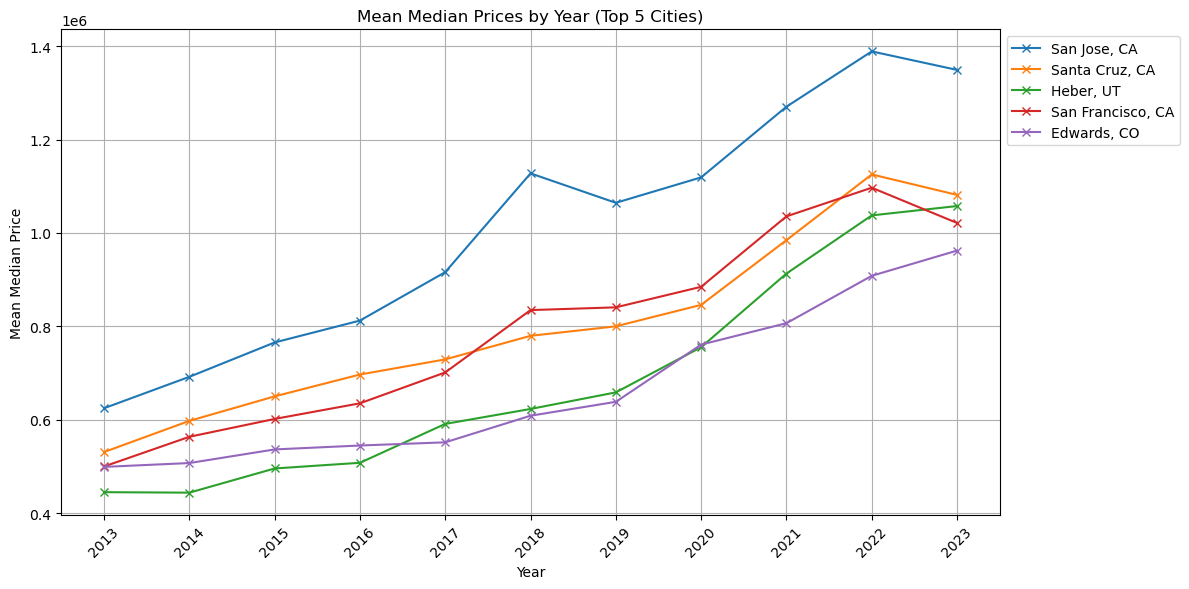

In [20]:
# Calculate the mean median prices for each city and sort them by the latest year (e.g., 2023)
top_cities = mean_prices_per_year_transposed.loc['2023'].sort_values(ascending=False).head(5)

# Plot the mean median prices for the top 5 cities over the years in a line plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
for city in top_cities.index:
    plt.plot(mean_prices_per_year_transposed.index, mean_prices_per_year_transposed[city], label=city, marker = 'x')

plt.title('Mean Median Prices by Year (Top 5 Cities)')
plt.xlabel('Year')
plt.ylabel('Mean Median Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Position the legend
plt.grid(True)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the plot area
plt.savefig("Images\SummaryStatiscs\Top5.png")
plt.show()

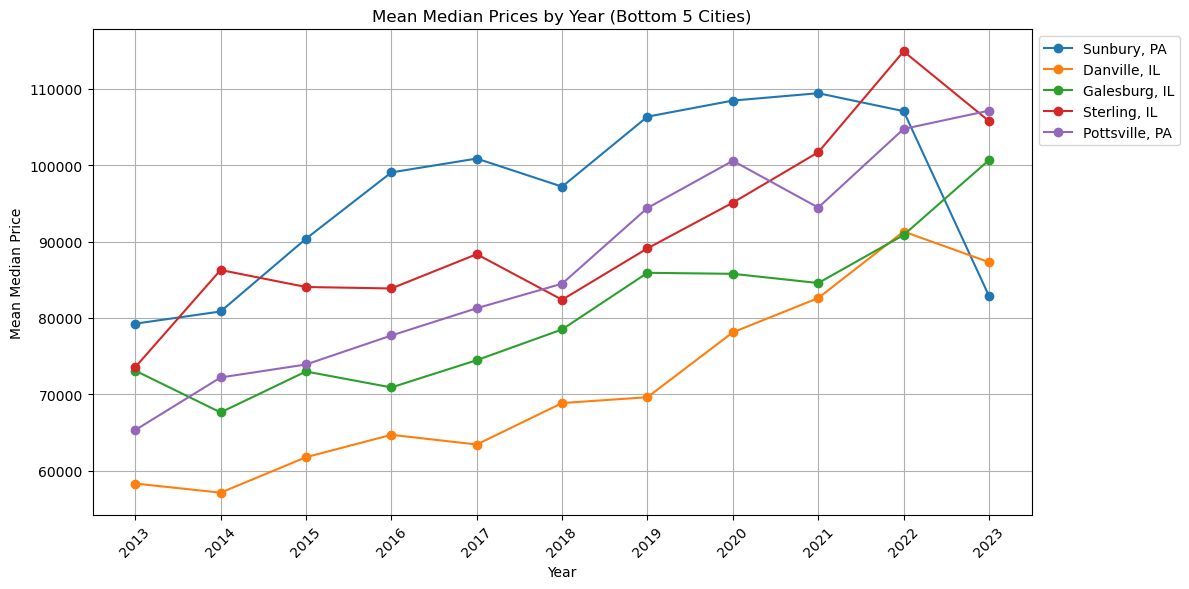

In [21]:
# Calculate the mean median prices for each city and sort them by the latest year (e.g., 2023)
bottom_cities = mean_prices_per_year_transposed.loc['2023'].sort_values(ascending=True).head(5)

# Plot the mean median prices for the bottom 5 cities over the years in a line plot
plt.figure(figsize=(12, 6))  
for city in bottom_cities.index:
    plt.plot(mean_prices_per_year_transposed.index, mean_prices_per_year_transposed[city], label=city, marker = 'o')

plt.title('Mean Median Prices by Year (Bottom 5 Cities)')
plt.xlabel('Year')
plt.ylabel('Mean Median Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))# Position the legend
plt.grid(True)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the plot area
plt.savefig("Images\SummaryStatiscs\Bottom5.png")

plt.show()